In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## task 01

Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.


In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

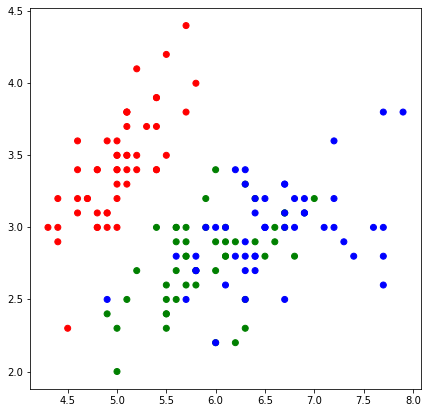

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k, weights):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append([distance, y_train[i]])
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        srt = sorted(test_distances)[0:k]
        for d in srt:
            if weights == 'distance':
                  d.append((1/2)**d[0])
            elif weights == 'serial':
                d.append(1/(srt.index(d) + 1))
            else:
                pass

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in srt:
            classes[d[1]] += d[2]
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k, weight, axes_counter, acc):
    axi = ax.flatten()[axes_counter]
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .05

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
#     axi.set_size_inches(7, 7)
    axi.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    axi.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    axi.set_xlim(xx.min(), xx.max())
    axi.set_ylim(yy.min(), yy.max())
    axi.set_title(f"k = {k}, weights = {weight}, accuracy = {round(acc, 2)}")
#     plt.show()

C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


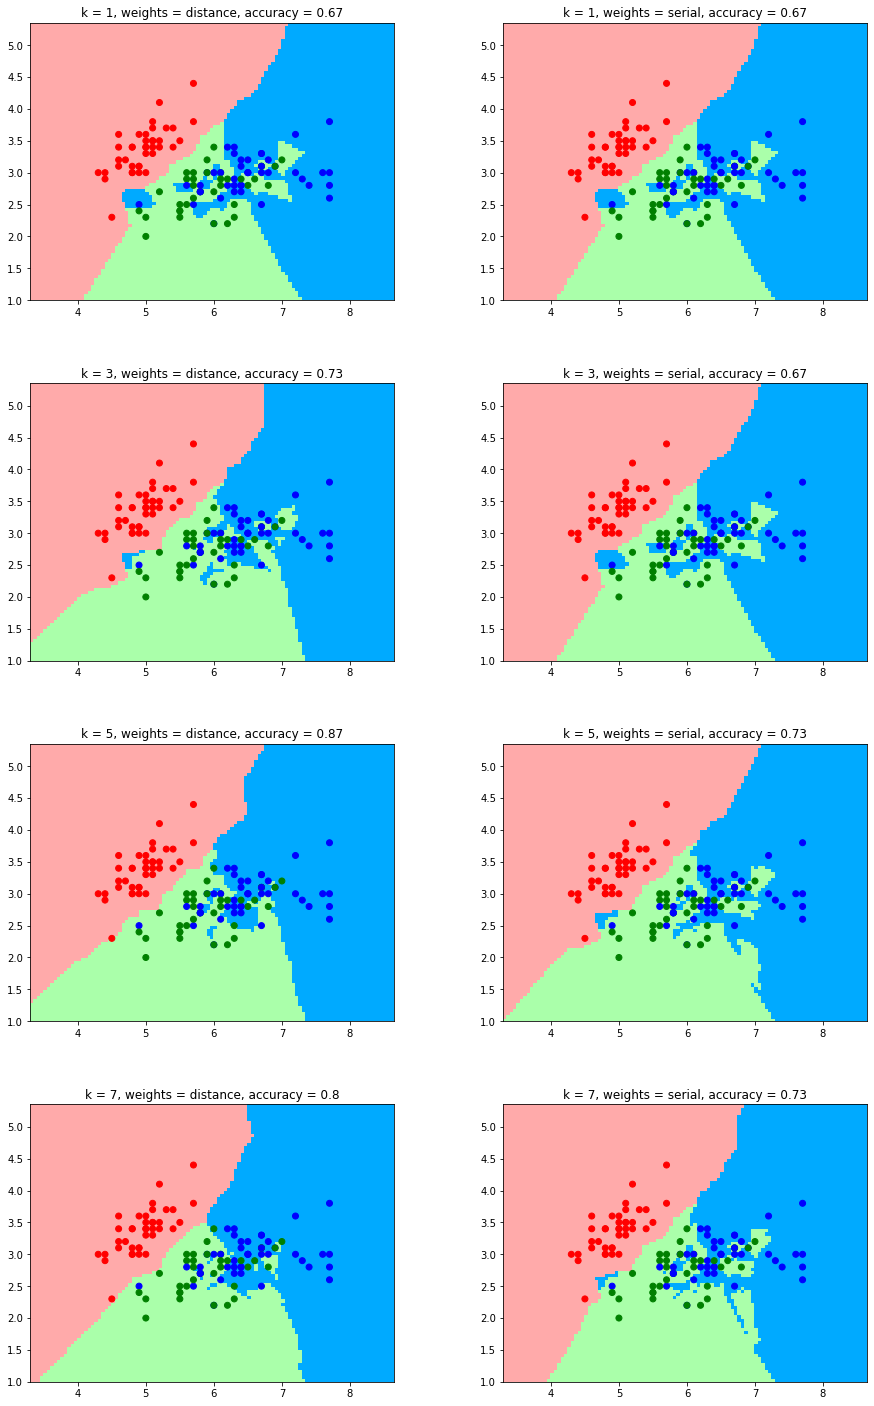

In [9]:
# kk = [1, 3]
kk = [1, 3, 5, 7]
rows = len(kk)

fig, ax = plt.subplots(nrows = rows, ncols = 2)
fig.set_size_inches(15, 25)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axes_counter = 0
for k in kk:
    for weight in ['distance', 'serial']:
        y_pred = knn(X_train, y_train, X_test, k, weight)
        acc = accuracy(y_pred, y_test)
        get_graph(X_train, y_train, k, weight, axes_counter, acc)
        axes_counter +=1

С ростом k сложность разделяющей гиперплоскости уменьшается, точность же поначалу растет, затем начинает падать. В данном случае я бы предложила определять класс по k = 5 соседям